<a href="https://colab.research.google.com/github/ThoKl/ds4geo/blob/master/Assignments/Session%202/Assignment_2_Thomas_Klotz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session/Week 2 Assignment | Thomas Klotz | Plots

---
#<font size="4"> (1) 3D-Plot: Vertical velocity model, European Alps </font>

In [156]:
# Import libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np


In [157]:
# READ DATA WITH PANDAS
vert_def = pd.read_csv("http://store.pangaea.de/Publications/Sanchez-etal_2018/ALPS2017_DEF_VT.GRD", header=12, delimiter=r"\s+")

#Change from m/a to mm/a
vert_def=vert_def * [1, 1, 100, 100]

#Set column names
vert_def.columns = ["Longitude [°]", "Latitude [°]", "Vertical Velocity [mm/a]", "Uncertainty [mm/a]"]

#Print data
print("Datasets:", len(vert_def))
print(vert_def)

Datasets: 1270
      Longitude [°]  Latitude [°]  Vertical Velocity [mm/a]  Uncertainty [mm/a]
0               4.3          43.0                   -0.1000              0.0616
1               4.6          43.0                   -0.1067              0.0544
2               4.9          43.0                   -0.1067              0.0544
3               5.2          43.0                   -0.0599              0.0216
4               5.5          43.0                   -0.0564              0.0168
...             ...           ...                       ...                 ...
1265           14.8          49.0                    0.0767              0.0262
1266           15.1          49.0                    0.0767              0.0262
1267           15.4          49.0                    0.0233              0.0624
1268           15.7          49.0                   -0.0195              0.0783
1269           16.0          49.0                   -0.0500              0.0374

[1270 rows x 4 columns]


In [158]:
# CLEAR VARIABLES, just in case, was necessary during testing
if 'x' in locals():
  del(x)

if 'y' in locals():
  del(y)

if 'z' in locals():
  del(z)

if 'X' in locals():
  del(X)

if 'Y' in locals():
  del(Y)

if 'Z' in locals():
  del(Z)

In [159]:
#CONVERT columns to numpy arrays
x=vert_def.iloc[:,0].values
y=np.unique(vert_def.iloc[:,1].values)
z=vert_def.iloc[:,2].values
print(len(y))

31


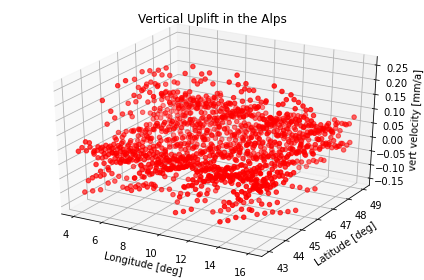

In [160]:
#3D-PLOT
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

#number of values in the grit
len_x = len(x) #number of values, could also be len(z)

min_y=min(y)
stepsize_y = 0.2
count_y = int((max(y)-min(y))/stepsize_y+1)

#print(count_y, len(x))
#print(Z)
#Create 2-dimensional Z-Array for mesh

#Initialize array
Z = np.array([[0.0]*count_y]*len(x))

#Fill array Z
for i in range(len(x)):
    for j in range(count_y):    #Latitude
        if int(y[j])==int(j+min_y):
          Z[i][j] = z[i]
        else:
          Z[i][j] = None

#Create X- and Y-Arrays for mesh
X, Y = np.meshgrid(x, y) 

'''
print(Z.ndim)
print(X.ndim)
print(Y.ndim)
print("Z:", np.shape(Z))
print("X:", np.shape(Z))
print("Y:", np.shape(Z))

print(Z.shape)
print(X.shape)
print(Y.shape)

print(len(z))
print(len(x))
print(len(y))
print(y)
'''


#ax.plot_wireframe(X, Y, Z, rstride = 2, cstride = 2) #Got a type-mismatch which i couldn't fix for wireframe so i switched to scatterplot
ax.scatter(X, Y, Z, c='r', marker='o', label='blue')
plt.title("Vertical Uplift in the Alps")
plt.tight_layout()
#plt.xlim(43, 49)
#plt.ylim(4, 17)
ax.set_xlabel('Longitude [deg]')
ax.set_ylabel('Latitude [deg]')
ax.set_zlabel('vert velocity [mm/a]')
#plt.legend("ert", loc=2, prop={'size':10}, handlelength=5)
plt.show()


<font size="2"> Note: Sure, the plot does not look pretty but i wanted to try a 3D-plot </font>


---
#<font size="4"> (2) Cooling and exhumation of tectonic units along BBT </font> 

In [161]:
# IMPORT LIBRARIES
import matplotlib.pyplot as plt
import pandas as pd
import io
import requests

In [162]:
# READ DATA
URL = "https://raw.githubusercontent.com/ds4geo/ds4geo/master/student_submitted_data/Exhumation_Tectonic_Units_BBT_Thomas_Klotz.CSV"
df = pd.read_csv(URL, sep=";", header=2, decimal=",")
#print(df)

In [163]:
# NAME COLUMNS
df.columns.values[0] = "Time"

#set sample catalogue
smp_names=["SAV20-74", "SAV20-42", "SAV11-84", "SAV11-44", "SAV11-8", "SA7CC-320", "SA7CC-247", "SA7CC-136", "SA7CC-065", "SA7CC-023", "SA7CC-006", "HTW-47834", "HTW-48050", "PK3"]
j=0 #variable to loop through sample catalogue

for i in range(1, len(df.columns), 10):

    df.columns.values[i] = "T_mean"+"("+smp_names[j]+")"
    df.columns.values[i+1] = "T_Lo"+"("+smp_names[j]+")"
    df.columns.values[i+2] = "T_Hi"+"("+smp_names[j]+")"
    df.columns.values[i+3] = "z(t, T_mean)"+"("+smp_names[j]+")"
    df.columns.values[i+4] = "z(T_Lo)"+"("+smp_names[j]+")"
    df.columns.values[i+5] = "z(T_Hi)"+"("+smp_names[j]+")"
    df.columns.values[i+6] = "TG"+"("+smp_names[j]+")"
    df.columns.values[i+7] = "TG_min"+"("+smp_names[j]+")"
    df.columns.values[i+8] = "TG_max"+"("+smp_names[j]+")"
    
    if i+9<len(df.columns):
      df.columns.values[i+9] = ""
    
    j+=1
    
#print(len(df.columns))
#print(df)

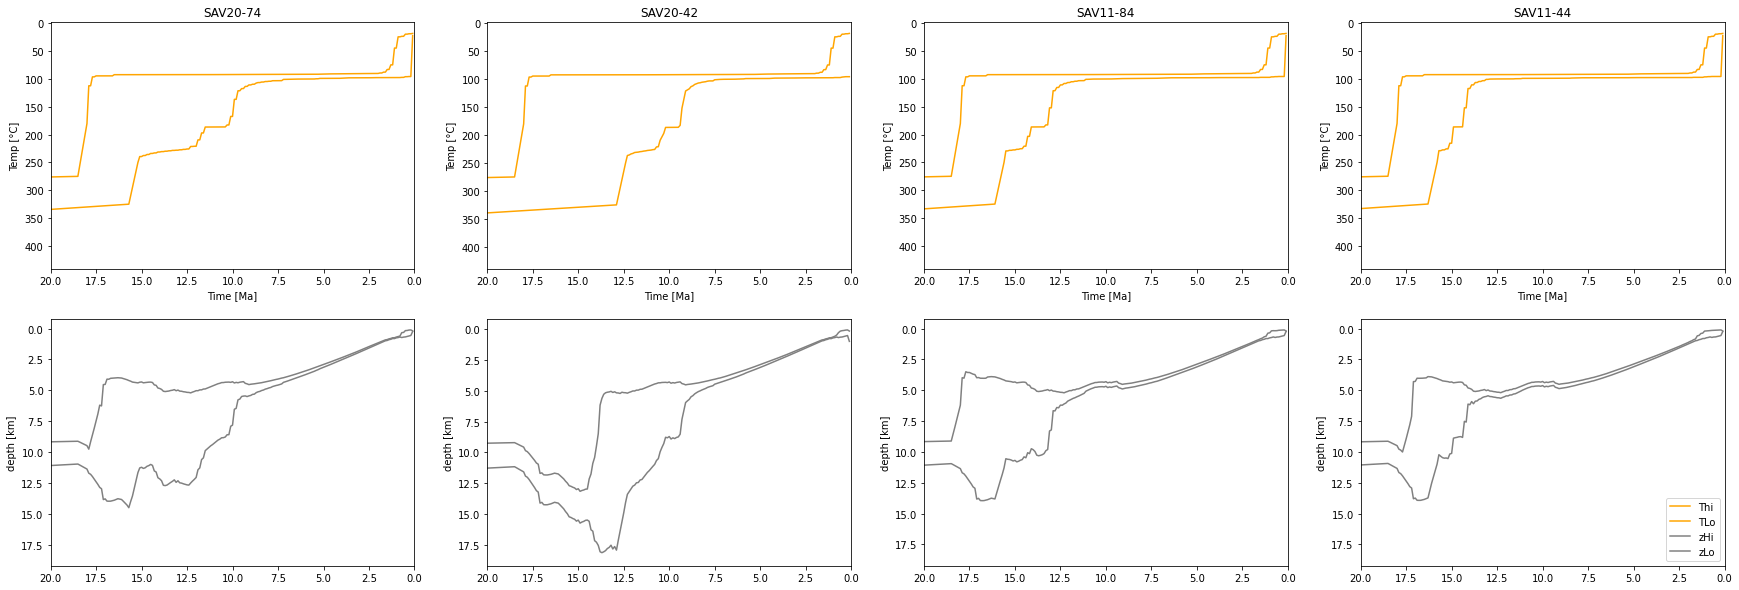

In [164]:
# PLOT DATA
number_of_samples=4

fig, ax = plt.subplots(2, number_of_samples, figsize=(30, 10))

#Loop through sample catalogue smp_names
for i in range(number_of_samples):
    T_Hi="T_Hi("+smp_names[i]+")"
    z_Lo="z(T_Lo)("+smp_names[i]+")"
    z_Hi="z(T_Hi)("+smp_names[i]+")"
    
    #Temperature
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
    ax[0][i].invert_xaxis()
    ax[0][i].invert_yaxis()
    l1,=ax[0][i].plot(df["Time"], df[T_Hi], label=T_Hi, color='orange')
    l2,=ax[0][i].plot(df["Time"], df[T_Lo], label=T_Lo, color='orange')
    ax[0][i].set_title(smp_names[i])
    ax[0][i].set(xlabel='Time [Ma]', ylabel='Temp [°C]')
    ax[0][i].set_xlim([20, 0])


    #Depth
    #plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    #plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    ax[1][i].invert_xaxis()
    ax[1][i].invert_yaxis()
    l3,=ax[1][i].plot(df["Time"], df[z_Lo], label=z_Lo, color='grey')
    l4,=ax[1][i].plot(df["Time"], df[z_Hi], label=z_Hi, color='grey')
    ax[1][i].set(ylabel='depth [km]')
    ax[1][i].set_xlim([20, 0])


plt.legend([l1, l2, l3, l4],["Thi", "TLo", "zHi", "zLo"], loc='lower right')
plt.show()



---



In [ ]:
'''HEADER DETECTOR (just an idea, not yet working)

for rownr in range(5, 20): # For some reason i can start the header detecter from row 5 or following only??
     detect_header = pd.read_csv("http://store.pangaea.de/Publications/Sanchez-etal_2018/ALPS2017_DEF_VT.GRD", header=rownr, nrows=1, delimiter="\s+")
     temp = detect_header.to_string()
     print (temp)  
     col_count = len(detect_header.columns)
     print(col_count)
     
     #print (csv.Sniffer().sniff(temp).delimiter)
     '''